# <font color=blue>Solutions for "Data Cleaning - Missing Values"</font>

In this assignment, you are going to use a dataset related to the US education system. Please download the ([dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)) from Kaggle. You are going to use `states_all.csv` within this dataset.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [3]:
education_df = pd.read_csv('../data/states_all.csv')

**(1)** Find the types of variables in the dataset and the missing (null) ratio of each variable.

In [4]:
education_df.isnull().sum()/education_df.isnull().count()

PRIMARY_KEY                    0.00
STATE                          0.00
YEAR                           0.00
ENROLL                         0.18
TOTAL_REVENUE                  0.14
FEDERAL_REVENUE                0.14
STATE_REVENUE                  0.14
LOCAL_REVENUE                  0.14
TOTAL_EXPENDITURE              0.14
INSTRUCTION_EXPENDITURE        0.14
SUPPORT_SERVICES_EXPENDITURE   0.14
OTHER_EXPENDITURE              0.18
CAPITAL_OUTLAY_EXPENDITURE     0.14
GRADES_PK_G                    0.12
GRADES_KG_G                    0.09
GRADES_4_G                     0.09
GRADES_8_G                     0.09
GRADES_12_G                    0.09
GRADES_1_8_G                   0.09
GRADES_9_12_G                  0.09
GRADES_ALL_G                   0.12
AVG_MATH_4_SCORE               0.64
AVG_MATH_8_SCORE               0.64
AVG_READING_4_SCORE            0.64
AVG_READING_8_SCORE            0.67
dtype: float64

**(2)** You may have noticed that our data has a year column. For now, forget about the year data and assume that each observation was made in the same year. Consider how you can fill in missing values for each variable. Filling in the missing values with a value is meaningful for which variables and for which ones?

In [5]:
education2_df = education_df.copy()

There are too many missing values on score columns.

        AVG_MATH_4_SCORE               0.64
        AVG_MATH_8_SCORE               0.64
        AVG_READING_4_SCORE            0.64
        AVG_READING_8_SCORE            0.67

In [6]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]

for col in fill_list:
    education2_df.loc[:, col].fillna(education2_df.loc[:, col].mean(), inplace=True)

**(3)** Now it's time to consider the factor of time! Review your answer in question 2 and fill in the missing data based on the values observed during that year. For example, if you want to fill a value with an average value, calculate the average of that year.

In [7]:
education3_df = education_df.copy()

years = education3_df["YEAR"].unique()

for col in fill_list:
    for year in years:
        YIL_SART = education3_df["YEAR"] == year
        education3_df.loc[YIL_SART, col] = education3_df.loc[YIL_SART, col].fillna(education3_df[YIL_SART][col].mean())

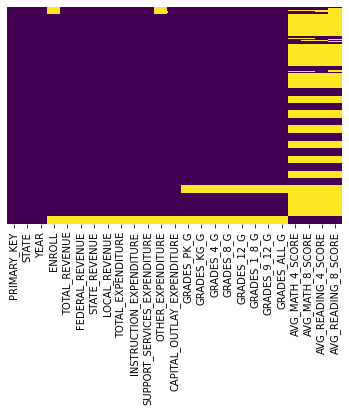

In [8]:
sns.heatmap(education3_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [9]:
education3_df.isnull().sum()/education_df.isnull().count()

PRIMARY_KEY                    0.00
STATE                          0.00
YEAR                           0.00
ENROLL                         0.07
TOTAL_REVENUE                  0.03
FEDERAL_REVENUE                0.03
STATE_REVENUE                  0.03
LOCAL_REVENUE                  0.03
TOTAL_EXPENDITURE              0.03
INSTRUCTION_EXPENDITURE        0.03
SUPPORT_SERVICES_EXPENDITURE   0.03
OTHER_EXPENDITURE              0.07
CAPITAL_OUTLAY_EXPENDITURE     0.03
GRADES_PK_G                    0.07
GRADES_KG_G                    0.07
GRADES_4_G                     0.07
GRADES_8_G                     0.07
GRADES_12_G                    0.07
GRADES_1_8_G                   0.07
GRADES_9_12_G                  0.07
GRADES_ALL_G                   0.07
AVG_MATH_4_SCORE               0.64
AVG_MATH_8_SCORE               0.64
AVG_READING_4_SCORE            0.64
AVG_READING_8_SCORE            0.67
dtype: float64

**(4)** This time, fill in the missing values by interpolating.

In [10]:
education4_df = education_df.copy()

for col in fill_list:
    education4_df.loc[:, col].interpolate(inplace=True)

**(5)** Compare your answers on the second, third and fourth questions. Do you notice a meaningful difference?

In [11]:
for col in fill_list:
    display("Column {} ".format(col))
    display(pd.concat([education_df[col], 
                       education2_df[col],
                       education3_df[col], 
                       education4_df[col]], axis=1).describe())

'Column ENROLL '

,ENROLL,ENROLL,ENROLL,ENROLL
count,1229.00,1492.00,1385.00,1441.00
mean,915930.82,915930.82,916165.43,795083.49
std,1065280.42,966772.54,1003532.18,1025900.78
min,43866.00,43866.00,43866.00,43866.00
25%,258314.00,315094.00,286759.00,130653.00
50%,648313.00,820414.00,737401.00,496513.00
75%,1014528.00,921178.00,962488.00,942738.00
max,6307022.00,6307022.00,6307022.00,6307022.00


'Column TOTAL_REVENUE '

,TOTAL_REVENUE,TOTAL_REVENUE,TOTAL_REVENUE,TOTAL_REVENUE
count,1280.00,1492.00,1441.00,1492.00
mean,9092081.86,9092081.86,9084107.88,8090706.84
std,11745187.40,10878184.01,11102042.88,11153174.40
min,465650.00,465650.00,465650.00,465650.00
25%,2186305.25,2546260.75,2425600.00,2044669.00
50%,5079546.00,6359310.50,5778507.00,4005586.00
75%,10859847.75,9276958.00,11168633.00,9276958.00
max,89217262.00,89217262.00,89217262.00,89217262.00


'Column FEDERAL_REVENUE '

,FEDERAL_REVENUE,FEDERAL_REVENUE,FEDERAL_REVENUE,FEDERAL_REVENUE
count,1280.00,1492.00,1441.00,1492.00
mean,766372.34,766372.34,766274.86,674956.52
std,1145241.59,1060702.42,1085057.29,1084241.64
min,31020.00,31020.00,31020.00,31020.00
25%,189354.00,217020.00,206853.00,123012.00
50%,403376.50,516741.00,446180.00,328684.00
75%,828966.00,766372.34,895642.00,750503.25
max,9990221.00,9990221.00,9990221.00,9990221.00


'Column STATE_REVENUE '

,STATE_REVENUE,STATE_REVENUE,STATE_REVENUE,STATE_REVENUE
count,1280.00,1492.00,1441.00,1492.00
mean,4216552.95,4216552.95,4213597.29,3784502.92
std,5543072.00,5133894.86,5237195.13,5242583.30
min,0.00,0.00,0.00,0.00
25%,1153097.25,1356434.00,1319582.00,1175899.00
50%,2537073.50,3127639.00,2857497.00,2122772.50
75%,5080939.25,4269811.00,5187230.37,4269811.00
max,50904567.00,50904567.00,50904567.00,50904567.00


'Column LOCAL_REVENUE '

,LOCAL_REVENUE,LOCAL_REVENUE,LOCAL_REVENUE,LOCAL_REVENUE
count,1280.00,1492.00,1441.00,1492.00
mean,4109156.57,4109156.57,4104235.73,3631247.39
std,5482970.61,5078230.02,5181474.72,5212326.44
min,22093.00,22093.00,22093.00,22093.00
25%,715834.50,944796.25,874706.00,745758.00
50%,2055780.50,2697257.00,2398344.00,1525442.00
75%,4768680.00,4109156.57,4995971.27,3959033.25
max,36105265.00,36105265.00,36105265.00,36105265.00


'Column TOTAL_EXPENDITURE '

,TOTAL_EXPENDITURE,TOTAL_EXPENDITURE,TOTAL_EXPENDITURE,TOTAL_EXPENDITURE
count,1280.00,1492.00,1441.00,1492.00
mean,9196680.87,9196680.87,9190557.29,8178959.83
std,11978126.90,11093928.44,11320836.92,11372469.58
min,481665.00,481665.00,481665.00,481665.00
25%,2165404.50,2523968.50,2427316.00,2034229.00
50%,5234505.50,6520223.50,5858385.00,4025103.50
75%,10745191.00,9434922.00,11169704.73,9434922.00
max,85320133.00,85320133.00,85320133.00,85320133.00


'Column INSTRUCTION_EXPENDITURE '

,INSTRUCTION_EXPENDITURE,INSTRUCTION_EXPENDITURE,INSTRUCTION_EXPENDITURE,INSTRUCTION_EXPENDITURE
count,1280.00,1492.00,1441.00,1492.00
mean,4762966.37,4762966.37,4758242.63,4217127.14
std,6293003.72,5828468.31,5947042.38,5980897.52
min,265549.00,265549.00,265549.00,265549.00
25%,1168032.00,1343611.25,1306105.00,921494.00
50%,2657452.00,3358141.50,3033016.00,2095197.50
75%,5568028.00,4938819.75,5672620.00,4938819.75
max,43964520.00,43964520.00,43964520.00,43964520.00


'Column SUPPORT_SERVICES_EXPENDITURE '

,SUPPORT_SERVICES_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE
count,1280.00,1492.00,1441.00,1492.00
mean,2680330.68,2680330.68,2677769.79,2382702.19
std,3353348.56,3105811.89,3170760.23,3190809.50
min,139963.00,139963.00,139963.00,139963.00
25%,635790.00,767368.75,735036.00,585700.00
50%,1525405.50,1913843.50,1720824.00,1161078.00
75%,3229650.75,2795887.50,3333043.00,2795887.50
max,26058021.00,26058021.00,26058021.00,26058021.00


'Column OTHER_EXPENDITURE '

,OTHER_EXPENDITURE,OTHER_EXPENDITURE,OTHER_EXPENDITURE,OTHER_EXPENDITURE
count,1229.00,1492.00,1385.00,1441.00
mean,429204.62,429204.62,428650.65,373941.23
std,534069.32,484683.23,504101.28,510837.48
min,11541.00,11541.00,11541.00,11541.00
25%,102831.00,135428.25,119934.00,53790.00
50%,271596.00,367233.50,307022.00,211713.00
75%,518600.00,456891.50,522347.52,467321.00
max,3995951.00,3995951.00,3995951.00,3995951.00


'Column CAPITAL_OUTLAY_EXPENDITURE '

,CAPITAL_OUTLAY_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
count,1280.00,1492.00,1441.00,1492.00
mean,902769.29,902769.29,904441.68,839046.06
std,1327561.82,1229564.18,1254176.41,1239500.57
min,12708.00,12708.00,12708.00,12708.00
25%,181564.50,216339.75,206241.00,216339.75
50%,510259.50,648217.50,580934.00,454302.00
75%,966851.50,902769.29,1024876.45,897595.00
max,10223657.00,10223657.00,10223657.00,10223657.00


'Column GRADES_PK_G '

,GRADES_PK_G,GRADES_PK_G,GRADES_PK_G,GRADES_PK_G
count,1319.00,1492.00,1390.00,1492.00
mean,17601.61,17601.61,17672.58,15792.65
std,30016.17,28221.11,29263.48,28700.54
min,0.00,0.00,0.00,0.00
25%,2021.00,2449.00,2183.25,1486.33
50%,8106.00,10505.00,9066.50,5555.50
75%,22295.00,19149.25,22788.75,19431.00
max,250911.00,250911.00,250911.00,250911.00


'Column GRADES_KG_G '

,GRADES_KG_G,GRADES_KG_G,GRADES_KG_G,GRADES_KG_G
count,1360.00,1492.00,1390.00,1492.00
mean,63746.76,63746.76,63810.17,58444.16
std,80205.14,76572.55,79336.99,78453.02
min,544.00,544.00,544.00,544.00
25%,11745.00,14016.00,11928.50,9595.00
50%,41597.50,48897.00,42968.00,38077.50
75%,73865.25,70372.75,72972.25,70372.75
max,530531.00,530531.00,530531.00,530531.00


'Column GRADES_4_G '

,GRADES_4_G,GRADES_4_G,GRADES_4_G,GRADES_4_G
count,1361.00,1492.00,1390.00,1492.00
mean,64538.93,64538.93,64590.15,59214.24
std,80293.39,76685.00,79451.94,78595.51
min,633.00,633.00,633.00,633.00
25%,13739.00,15195.50,14190.50,9741.50
50%,43272.00,49884.50,44909.50,37152.00
75%,75481.00,71814.25,75149.75,71814.25
max,493415.00,493415.00,493415.00,493415.00


'Column GRADES_8_G '

,GRADES_8_G,GRADES_8_G,GRADES_8_G,GRADES_8_G
count,1361.00,1492.00,1390.00,1492.00
mean,64271.06,64271.06,64331.74,58943.26
std,78910.55,75364.30,78083.98,77309.15
min,437.00,437.00,437.00,437.00
25%,13342.00,15682.75,13698.25,9845.75
50%,43339.00,49571.00,44756.50,37652.50
75%,76566.00,72131.00,75016.25,72131.00
max,500143.00,500143.00,500143.00,500143.00


'Column GRADES_12_G '

,GRADES_12_G,GRADES_12_G,GRADES_12_G,GRADES_12_G
count,1361.00,1492.00,1390.00,1492.00
mean,54268.92,54268.92,54418.08,49749.66
std,67889.28,64838.33,67187.34,66462.69
min,311.00,311.00,311.00,311.00
25%,10919.00,13437.00,11161.75,8661.75
50%,36735.00,39566.00,37541.50,32926.00
75%,67460.00,64616.25,67026.00,64616.25
max,498403.00,498403.00,498403.00,498403.00


'Column GRADES_1_8_G '

,GRADES_1_8_G,GRADES_1_8_G,GRADES_1_8_G,GRADES_1_8_G
count,1361.00,1492.00,1390.00,1492.00
mean,519214.04,519214.04,519620.04,476312.77
std,643638.43,614713.28,636893.23,630183.68
min,4878.00,4878.00,4878.00,4878.00
25%,110626.00,121152.25,112971.25,78847.50
50%,345775.00,401586.50,361170.50,304106.00
75%,611905.00,574911.75,605224.25,574911.75
max,3929869.00,3929869.00,3929869.00,3929869.00


'Column GRADES_9_12_G '

,GRADES_9_12_G,GRADES_9_12_G,GRADES_9_12_G,GRADES_9_12_G
count,1361.00,1492.00,1390.00,1492.00
mean,247071.35,247071.35,247493.25,226545.50
std,307705.63,293877.32,304494.30,301273.53
min,1808.00,1808.00,1808.00,1808.00
25%,51471.00,59197.50,52703.00,38413.50
50%,164260.00,181701.00,170652.50,143893.00
75%,290502.00,282539.00,288852.25,282539.00
max,2013687.00,2013687.00,2013687.00,2013687.00


'Column GRADES_ALL_G '

,GRADES_ALL_G,GRADES_ALL_G,GRADES_ALL_G,GRADES_ALL_G
count,1319.00,1492.00,1390.00,1492.00
mean,802441.51,802441.51,802917.84,742448.35
std,970703.07,912652.17,945616.25,930521.87
min,7254.00,7254.00,7254.00,7254.00
25%,181065.00,229357.75,193978.50,169160.25
50%,550342.00,647326.00,598392.00,452735.50
75%,928275.50,872422.00,904556.25,883062.25
max,5944746.00,5944746.00,5944746.00,5944746.00


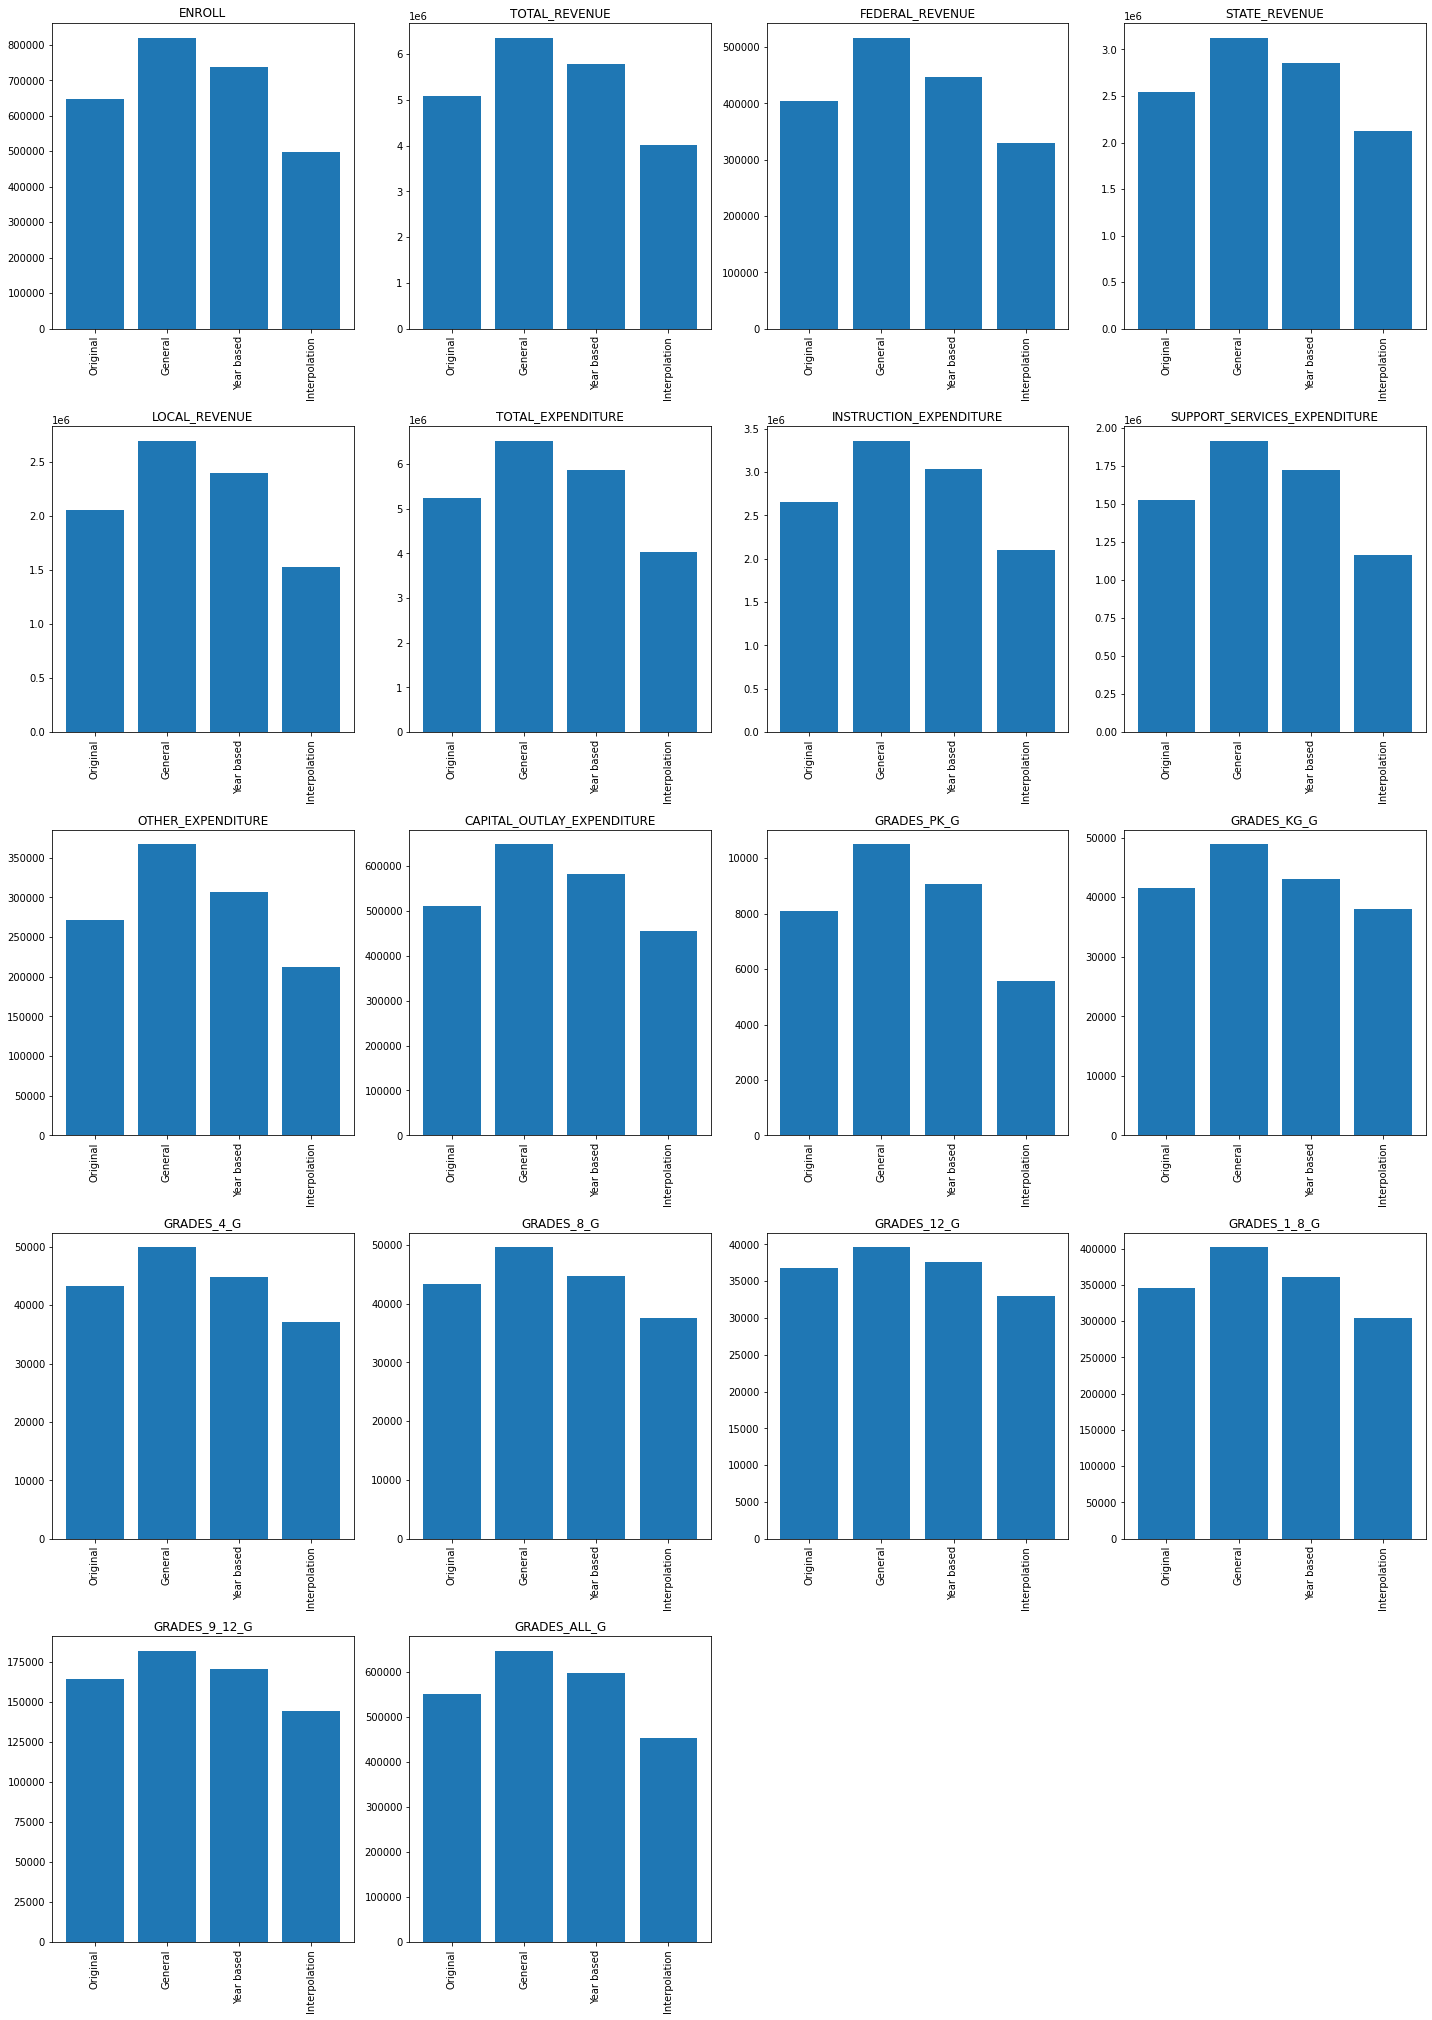

In [12]:
fig = plt.figure(figsize=(20,100))

for i, col in enumerate(fill_list):
    df = pd.concat([education_df[col], education2_df[col],
                     education3_df[col], education4_df[col]], axis=1)
    plt.subplot(len(fill_list), 4, i+1)
    plt.bar(["Original", "General", "Year based", "Interpolation"], df.median())
    plt.xticks(rotation='vertical')
    plt.title("{}".format(col))
    
plt.tight_layout()
plt.show()